In [ ]:
import scipy.stats as stats
import seaborn as sns
import pandas as pd

In [ ]:
penguins = sns.load_dataset('penguins')

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
penguins.isna().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [ ]:
penguins.dropna(inplace=True)

In [ ]:
penguins.shape

(333, 7)

In [ ]:
data = pd.get_dummies(penguins, dtype=int, drop_first=True)

In [ ]:
data.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,39.1,18.7,181.0,3750.0,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,0,0,0,1,0
4,36.7,19.3,193.0,3450.0,0,0,0,1,0
5,39.3,20.6,190.0,3650.0,0,0,0,1,1


In [ ]:
data.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.449098,0.488256,0.032118,-0.367821,0.344078
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,0.323505,-0.822293,0.457326,0.265173,0.372673
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,-0.186175,0.866854,-0.425459,-0.273304,0.255169
body_mass_g,0.589451,-0.472016,0.872979,1.000000,-0.298622,0.821178,-0.464666,-0.251369,0.424987
species_Chinstrap,0.449098,0.323505,-0.186175,-0.298622,1.000000,-0.377744,0.661894,-0.205351,-0.004564
species_Gentoo,0.488256,-0.822293,0.866854,0.821178,-0.377744,1.000000,-0.570702,-0.302296,0.012082
island_Dream,0.032118,0.457326,-0.425459,-0.464666,0.661894,-0.570702,1.000000,-0.310248,-0.000673
island_Torgersen,-0.367821,0.265173,-0.273304,-0.251369,-0.205351,-0.302296,-0.310248,1.000000,-0.012278
sex_Male,0.344078,0.372673,0.255169,0.424987,-0.004564,0.012082,-0.000673,-0.012278,1.000000


In [ ]:
data.bill_length_mm.corr(data.flipper_length_mm)

0.6530956386670856

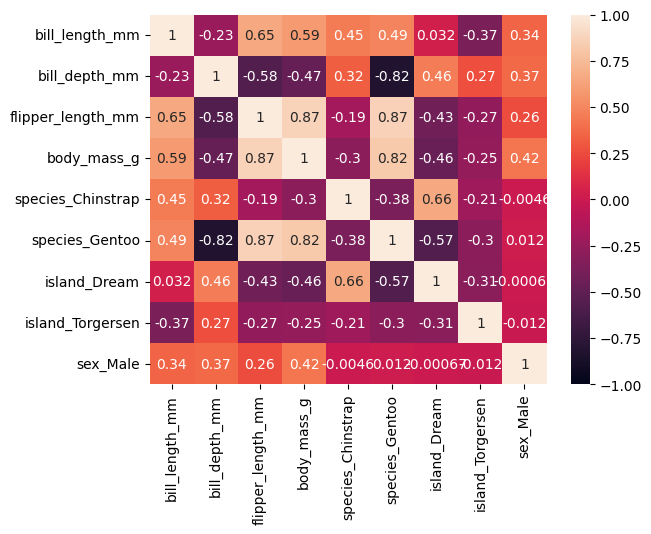

In [ ]:
sns.heatmap(data.corr(), vmin= -1, vmax=1, annot=True);

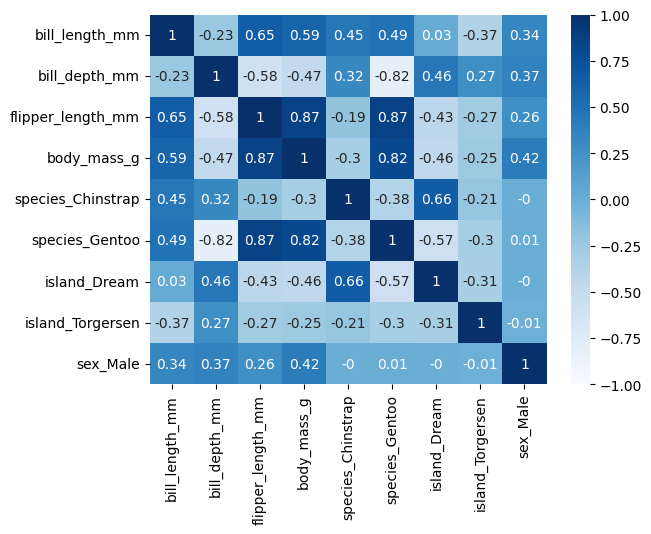

In [ ]:
sns.heatmap(round(data.corr(),2), vmin=-1, vmax=1, annot=True, cmap='Blues');

In [ ]:
data.drop(columns=['sex_Male','island_Dream','island_Torgersen'], inplace=True)

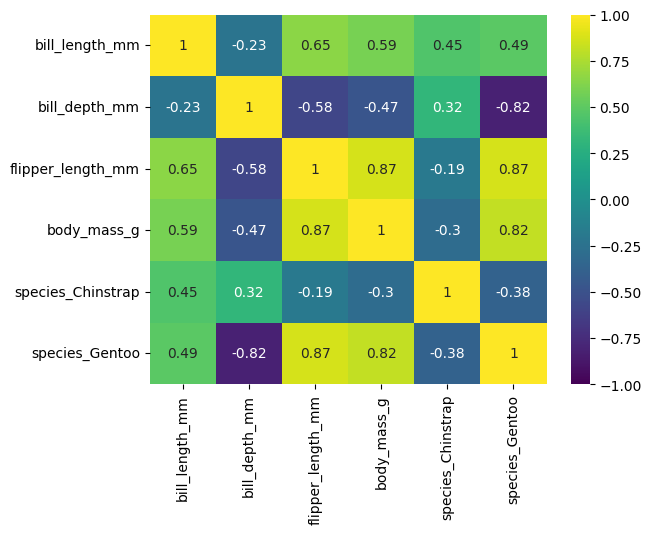

In [ ]:
sns.heatmap(round(data.corr(),2), vmin=-1, vmax=1, annot=True, cmap='viridis');

In [ ]:
#Apart from this -
import scipy.stats as stats

print(stats.pearsonr(data.bill_length_mm,data.bill_depth_mm))
print(stats.spearmanr(data.bill_length_mm,data.bill_depth_mm))
print(stats.kendalltau(data.bill_length_mm,data.bill_depth_mm))

# Numpy also has these
import numpy as np
np.corrcoef(data.bill_length_mm,data.bill_depth_mm)

PearsonRResult(statistic=-0.2286256359130291, pvalue=2.528289720944363e-05)
SignificanceResult(statistic=-0.21385939634811674, pvalue=8.371953691064487e-05)
SignificanceResult(statistic=-0.11823955170705089, pvalue=0.0014306758760381205)


array([[ 1.        , -0.22862564],
       [-0.22862564,  1.        ]])